## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  99.119316   484.994709  0.463946  9.925001  1.071074
1  92.912787   226.603319  0.385431  8.021464  0.662502
2   2.959204  1071.636090  0.438536  6.585366  1.411243
3  77.798235  1358.156317  0.337064  7.901757  1.285840
4  43.993052   447.619592  0.988134  5.222025  1.626554


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9953438	total: 160ms	remaining: 2m 40s
1:	learn: 0.9837809	total: 162ms	remaining: 1m 20s
2:	learn: 0.9720563	total: 165ms	remaining: 54.8s
3:	learn: 0.9603339	total: 166ms	remaining: 41.2s
4:	learn: 0.9496351	total: 169ms	remaining: 33.7s
5:	learn: 0.9391603	total: 173ms	remaining: 28.7s
6:	learn: 0.9279342	total: 174ms	remaining: 24.7s
7:	learn: 0.9165221	total: 175ms	remaining: 21.7s
8:	learn: 0.9053017	total: 176ms	remaining: 19.4s
9:	learn: 0.8942847	total: 177ms	remaining: 17.5s


10:	learn: 0.8859216	total: 178ms	remaining: 16s
11:	learn: 0.8779806	total: 181ms	remaining: 14.9s
12:	learn: 0.8704315	total: 183ms	remaining: 13.9s
13:	learn: 0.8604306	total: 184ms	remaining: 12.9s
14:	learn: 0.8495779	total: 185ms	remaining: 12.1s
15:	learn: 0.8407292	total: 186ms	remaining: 11.4s
16:	learn: 0.8302575	total: 186ms	remaining: 10.8s
17:	learn: 0.8227046	total: 187ms	remaining: 10.2s
18:	learn: 0.8132356	total: 189ms	remaining: 9.74s
19:	learn: 0.8041722	total: 190ms	remaining: 9.29s
20:	learn: 0.7946848	total: 191ms	remaining: 8.91s
21:	learn: 0.7858358	total: 193ms	remaining: 8.57s
22:	learn: 0.7775231	total: 194ms	remaining: 8.23s
23:	learn: 0.7680445	total: 195ms	remaining: 7.94s
24:	learn: 0.7606861	total: 196ms	remaining: 7.64s
25:	learn: 0.7532554	total: 197ms	remaining: 7.39s
26:	learn: 0.7446823	total: 198ms	remaining: 7.15s
27:	learn: 0.7360670	total: 199ms	remaining: 6.91s
28:	learn: 0.7284117	total: 200ms	remaining: 6.69s
29:	learn: 0.7201233	total: 200ms

81:	learn: 0.4426339	total: 259ms	remaining: 2.9s
82:	learn: 0.4387764	total: 260ms	remaining: 2.87s
83:	learn: 0.4354905	total: 260ms	remaining: 2.84s
84:	learn: 0.4322181	total: 261ms	remaining: 2.81s
85:	learn: 0.4281550	total: 265ms	remaining: 2.81s
86:	learn: 0.4249220	total: 266ms	remaining: 2.79s
87:	learn: 0.4211548	total: 266ms	remaining: 2.76s


88:	learn: 0.4169635	total: 272ms	remaining: 2.78s
89:	learn: 0.4131220	total: 272ms	remaining: 2.75s
90:	learn: 0.4106428	total: 273ms	remaining: 2.73s
91:	learn: 0.4071179	total: 276ms	remaining: 2.72s
92:	learn: 0.4039449	total: 276ms	remaining: 2.69s
93:	learn: 0.4003697	total: 277ms	remaining: 2.67s
94:	learn: 0.3964724	total: 277ms	remaining: 2.64s
95:	learn: 0.3929585	total: 279ms	remaining: 2.62s
96:	learn: 0.3896400	total: 280ms	remaining: 2.6s
97:	learn: 0.3860628	total: 283ms	remaining: 2.61s
98:	learn: 0.3832006	total: 286ms	remaining: 2.61s
99:	learn: 0.3806108	total: 287ms	remaining: 2.58s
100:	learn: 0.3775564	total: 287ms	remaining: 2.56s
101:	learn: 0.3748979	total: 288ms	remaining: 2.53s
102:	learn: 0.3714635	total: 288ms	remaining: 2.51s
103:	learn: 0.3688068	total: 289ms	remaining: 2.49s
104:	learn: 0.3663359	total: 290ms	remaining: 2.47s
105:	learn: 0.3630637	total: 291ms	remaining: 2.45s
106:	learn: 0.3604127	total: 291ms	remaining: 2.43s
107:	learn: 0.3576329	tot

189:	learn: 0.2136546	total: 345ms	remaining: 1.47s
190:	learn: 0.2126013	total: 346ms	remaining: 1.46s
191:	learn: 0.2112502	total: 358ms	remaining: 1.51s


192:	learn: 0.2100278	total: 360ms	remaining: 1.51s
193:	learn: 0.2091911	total: 361ms	remaining: 1.5s
194:	learn: 0.2082327	total: 361ms	remaining: 1.49s
195:	learn: 0.2070104	total: 362ms	remaining: 1.48s
196:	learn: 0.2060754	total: 368ms	remaining: 1.5s
197:	learn: 0.2047296	total: 369ms	remaining: 1.49s
198:	learn: 0.2037293	total: 369ms	remaining: 1.49s
199:	learn: 0.2027644	total: 370ms	remaining: 1.48s
200:	learn: 0.2017716	total: 370ms	remaining: 1.47s
201:	learn: 0.2007054	total: 371ms	remaining: 1.46s
202:	learn: 0.1998359	total: 371ms	remaining: 1.46s
203:	learn: 0.1987876	total: 372ms	remaining: 1.45s
204:	learn: 0.1978589	total: 376ms	remaining: 1.46s
205:	learn: 0.1968994	total: 377ms	remaining: 1.45s
206:	learn: 0.1958146	total: 377ms	remaining: 1.45s
207:	learn: 0.1949936	total: 378ms	remaining: 1.44s
208:	learn: 0.1941047	total: 378ms	remaining: 1.43s
209:	learn: 0.1931847	total: 379ms	remaining: 1.43s
210:	learn: 0.1919407	total: 382ms	remaining: 1.43s
211:	learn: 0.

339:	learn: 0.1151368	total: 479ms	remaining: 929ms
340:	learn: 0.1145644	total: 479ms	remaining: 926ms
341:	learn: 0.1140022	total: 481ms	remaining: 925ms
342:	learn: 0.1134885	total: 481ms	remaining: 922ms
343:	learn: 0.1131840	total: 482ms	remaining: 919ms
344:	learn: 0.1125851	total: 482ms	remaining: 916ms
345:	learn: 0.1120505	total: 483ms	remaining: 912ms
346:	learn: 0.1115310	total: 483ms	remaining: 910ms
347:	learn: 0.1110522	total: 484ms	remaining: 907ms
348:	learn: 0.1105829	total: 484ms	remaining: 904ms
349:	learn: 0.1101112	total: 485ms	remaining: 901ms
350:	learn: 0.1096314	total: 486ms	remaining: 898ms
351:	learn: 0.1091120	total: 486ms	remaining: 895ms
352:	learn: 0.1088348	total: 486ms	remaining: 892ms
353:	learn: 0.1083321	total: 487ms	remaining: 889ms
354:	learn: 0.1078784	total: 488ms	remaining: 886ms
355:	learn: 0.1073837	total: 488ms	remaining: 883ms
356:	learn: 0.1071771	total: 489ms	remaining: 880ms
357:	learn: 0.1067095	total: 489ms	remaining: 877ms
358:	learn: 

367:	learn: 0.1036767	total: 494ms	remaining: 849ms
368:	learn: 0.1032759	total: 497ms	remaining: 850ms
369:	learn: 0.1028823	total: 498ms	remaining: 847ms
370:	learn: 0.1022583	total: 498ms	remaining: 845ms
371:	learn: 0.1016459	total: 499ms	remaining: 842ms
372:	learn: 0.1011643	total: 499ms	remaining: 839ms
373:	learn: 0.1009776	total: 500ms	remaining: 836ms
374:	learn: 0.1003847	total: 500ms	remaining: 833ms
375:	learn: 0.1000059	total: 502ms	remaining: 833ms
376:	learn: 0.0996340	total: 502ms	remaining: 830ms
377:	learn: 0.0990544	total: 503ms	remaining: 827ms
378:	learn: 0.0984857	total: 504ms	remaining: 825ms
379:	learn: 0.0983079	total: 506ms	remaining: 826ms
380:	learn: 0.0979460	total: 507ms	remaining: 824ms
381:	learn: 0.0973906	total: 508ms	remaining: 821ms
382:	learn: 0.0968461	total: 508ms	remaining: 818ms
383:	learn: 0.0966749	total: 508ms	remaining: 816ms
384:	learn: 0.0961886	total: 509ms	remaining: 813ms
385:	learn: 0.0956602	total: 510ms	remaining: 811ms
386:	learn: 

459:	learn: 0.0768002	total: 592ms	remaining: 695ms
460:	learn: 0.0765125	total: 592ms	remaining: 693ms
461:	learn: 0.0761600	total: 594ms	remaining: 692ms
462:	learn: 0.0758285	total: 595ms	remaining: 690ms
463:	learn: 0.0755071	total: 595ms	remaining: 688ms
464:	learn: 0.0754335	total: 596ms	remaining: 686ms
465:	learn: 0.0753610	total: 596ms	remaining: 683ms
466:	learn: 0.0750629	total: 597ms	remaining: 681ms
467:	learn: 0.0749918	total: 597ms	remaining: 679ms
468:	learn: 0.0749217	total: 598ms	remaining: 677ms
469:	learn: 0.0748641	total: 598ms	remaining: 675ms
470:	learn: 0.0746002	total: 599ms	remaining: 673ms
471:	learn: 0.0743127	total: 600ms	remaining: 671ms
472:	learn: 0.0742440	total: 601ms	remaining: 669ms
473:	learn: 0.0741878	total: 601ms	remaining: 667ms
474:	learn: 0.0739298	total: 602ms	remaining: 665ms
475:	learn: 0.0736903	total: 603ms	remaining: 663ms
476:	learn: 0.0736351	total: 603ms	remaining: 661ms
477:	learn: 0.0735806	total: 604ms	remaining: 659ms
478:	learn: 

485:	learn: 0.0719048	total: 609ms	remaining: 644ms
486:	learn: 0.0716141	total: 609ms	remaining: 642ms
487:	learn: 0.0713280	total: 610ms	remaining: 640ms
488:	learn: 0.0711173	total: 611ms	remaining: 638ms
489:	learn: 0.0710544	total: 611ms	remaining: 636ms
490:	learn: 0.0708469	total: 612ms	remaining: 634ms
491:	learn: 0.0706198	total: 612ms	remaining: 632ms
492:	learn: 0.0702982	total: 613ms	remaining: 630ms
493:	learn: 0.0700703	total: 613ms	remaining: 628ms
494:	learn: 0.0700090	total: 614ms	remaining: 626ms
495:	learn: 0.0697329	total: 615ms	remaining: 624ms
496:	learn: 0.0694755	total: 615ms	remaining: 622ms
497:	learn: 0.0691357	total: 616ms	remaining: 621ms
498:	learn: 0.0689353	total: 616ms	remaining: 619ms
499:	learn: 0.0688718	total: 617ms	remaining: 617ms
500:	learn: 0.0686714	total: 623ms	remaining: 621ms
501:	learn: 0.0684298	total: 625ms	remaining: 620ms
502:	learn: 0.0683704	total: 626ms	remaining: 618ms
503:	learn: 0.0681616	total: 627ms	remaining: 617ms
504:	learn: 

571:	learn: 0.0568449	total: 758ms	remaining: 567ms


572:	learn: 0.0566894	total: 772ms	remaining: 576ms
573:	learn: 0.0564463	total: 774ms	remaining: 574ms
574:	learn: 0.0562933	total: 776ms	remaining: 574ms
575:	learn: 0.0561290	total: 779ms	remaining: 573ms
576:	learn: 0.0559133	total: 801ms	remaining: 588ms
577:	learn: 0.0556754	total: 811ms	remaining: 592ms
578:	learn: 0.0556286	total: 811ms	remaining: 590ms
579:	learn: 0.0554783	total: 812ms	remaining: 588ms
580:	learn: 0.0552476	total: 814ms	remaining: 587ms
581:	learn: 0.0551028	total: 815ms	remaining: 585ms
582:	learn: 0.0548697	total: 815ms	remaining: 583ms
583:	learn: 0.0547276	total: 816ms	remaining: 581ms
584:	learn: 0.0545808	total: 817ms	remaining: 579ms
585:	learn: 0.0545240	total: 817ms	remaining: 577ms
586:	learn: 0.0544818	total: 818ms	remaining: 575ms
587:	learn: 0.0543370	total: 818ms	remaining: 573ms
588:	learn: 0.0541080	total: 819ms	remaining: 571ms
589:	learn: 0.0540665	total: 819ms	remaining: 569ms
590:	learn: 0.0539237	total: 820ms	remaining: 567ms
591:	learn: 

759:	learn: 0.0314839	total: 906ms	remaining: 286ms
760:	learn: 0.0313618	total: 907ms	remaining: 285ms
761:	learn: 0.0312420	total: 908ms	remaining: 284ms
762:	learn: 0.0311975	total: 909ms	remaining: 282ms
763:	learn: 0.0310692	total: 909ms	remaining: 281ms
764:	learn: 0.0309523	total: 910ms	remaining: 279ms
765:	learn: 0.0309166	total: 910ms	remaining: 278ms
766:	learn: 0.0307704	total: 911ms	remaining: 277ms
767:	learn: 0.0306719	total: 912ms	remaining: 275ms
768:	learn: 0.0305707	total: 912ms	remaining: 274ms
769:	learn: 0.0304711	total: 913ms	remaining: 273ms
770:	learn: 0.0303484	total: 914ms	remaining: 271ms
771:	learn: 0.0303134	total: 915ms	remaining: 270ms
772:	learn: 0.0301737	total: 915ms	remaining: 269ms


773:	learn: 0.0300901	total: 916ms	remaining: 267ms
774:	learn: 0.0299844	total: 916ms	remaining: 266ms
775:	learn: 0.0299427	total: 917ms	remaining: 265ms
776:	learn: 0.0298486	total: 918ms	remaining: 264ms
777:	learn: 0.0297532	total: 919ms	remaining: 262ms
778:	learn: 0.0296593	total: 919ms	remaining: 261ms
779:	learn: 0.0295563	total: 920ms	remaining: 259ms
780:	learn: 0.0295159	total: 920ms	remaining: 258ms
781:	learn: 0.0293813	total: 921ms	remaining: 257ms
782:	learn: 0.0292811	total: 921ms	remaining: 255ms
783:	learn: 0.0292417	total: 921ms	remaining: 254ms
784:	learn: 0.0291508	total: 922ms	remaining: 253ms
785:	learn: 0.0290771	total: 922ms	remaining: 251ms
786:	learn: 0.0289871	total: 923ms	remaining: 250ms
787:	learn: 0.0289664	total: 923ms	remaining: 248ms
788:	learn: 0.0288777	total: 924ms	remaining: 247ms
789:	learn: 0.0287818	total: 924ms	remaining: 246ms
790:	learn: 0.0286844	total: 925ms	remaining: 244ms
791:	learn: 0.0285890	total: 926ms	remaining: 243ms
792:	learn: 

942:	learn: 0.0190367	total: 1.04s	remaining: 62.9ms
943:	learn: 0.0189590	total: 1.04s	remaining: 61.8ms
944:	learn: 0.0189372	total: 1.04s	remaining: 60.6ms
945:	learn: 0.0188861	total: 1.04s	remaining: 59.5ms
946:	learn: 0.0188107	total: 1.04s	remaining: 58.4ms
947:	learn: 0.0187233	total: 1.04s	remaining: 57.2ms
948:	learn: 0.0186452	total: 1.04s	remaining: 56.1ms
949:	learn: 0.0186240	total: 1.04s	remaining: 55ms
950:	learn: 0.0186031	total: 1.04s	remaining: 53.8ms
951:	learn: 0.0185532	total: 1.04s	remaining: 52.7ms
952:	learn: 0.0184680	total: 1.04s	remaining: 51.6ms
953:	learn: 0.0183926	total: 1.04s	remaining: 50.4ms
954:	learn: 0.0183751	total: 1.05s	remaining: 49.3ms
955:	learn: 0.0183265	total: 1.05s	remaining: 48.2ms
956:	learn: 0.0182434	total: 1.05s	remaining: 47ms
957:	learn: 0.0182238	total: 1.05s	remaining: 45.9ms
958:	learn: 0.0181511	total: 1.05s	remaining: 44.8ms
959:	learn: 0.0181311	total: 1.05s	remaining: 43.7ms
960:	learn: 0.0180837	total: 1.05s	remaining: 42.5

963:	learn: 0.0178901	total: 1.05s	remaining: 39.2ms
964:	learn: 0.0178204	total: 1.05s	remaining: 38.1ms
965:	learn: 0.0178010	total: 1.05s	remaining: 37ms
966:	learn: 0.0177662	total: 1.05s	remaining: 35.9ms
967:	learn: 0.0177480	total: 1.05s	remaining: 34.8ms
968:	learn: 0.0176805	total: 1.05s	remaining: 33.7ms
969:	learn: 0.0176615	total: 1.05s	remaining: 32.6ms
970:	learn: 0.0176001	total: 1.05s	remaining: 31.4ms
971:	learn: 0.0175841	total: 1.05s	remaining: 30.3ms
972:	learn: 0.0175053	total: 1.05s	remaining: 29.2ms
973:	learn: 0.0174765	total: 1.05s	remaining: 28.1ms
974:	learn: 0.0174164	total: 1.05s	remaining: 27ms
975:	learn: 0.0173989	total: 1.05s	remaining: 25.9ms
976:	learn: 0.0173805	total: 1.05s	remaining: 24.8ms
977:	learn: 0.0173217	total: 1.05s	remaining: 23.7ms
978:	learn: 0.0173038	total: 1.05s	remaining: 22.6ms
979:	learn: 0.0172462	total: 1.06s	remaining: 21.6ms
980:	learn: 0.0172189	total: 1.06s	remaining: 20.5ms
981:	learn: 0.0171546	total: 1.06s	remaining: 19.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2849478881912099


ABC Pre-generator MAE 0.26629840070935207


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

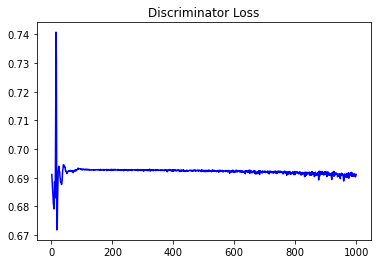

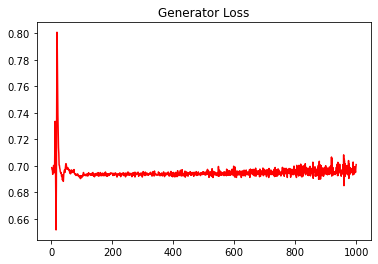

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2546048620622605


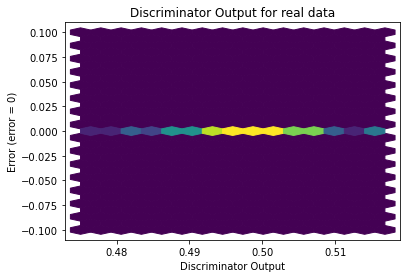

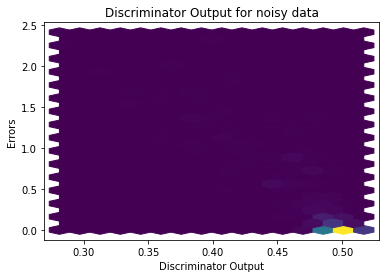

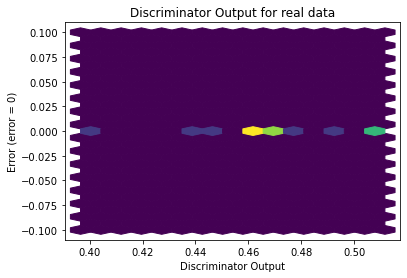

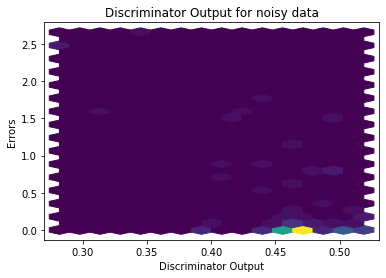

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

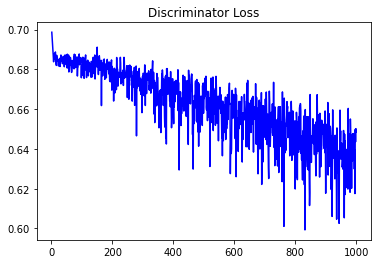

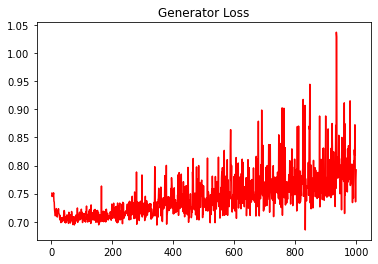

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.3077254525460303


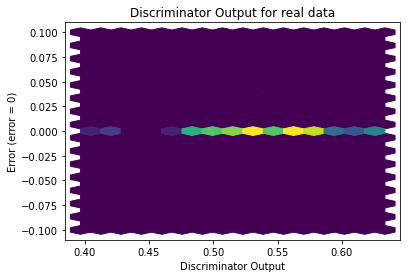

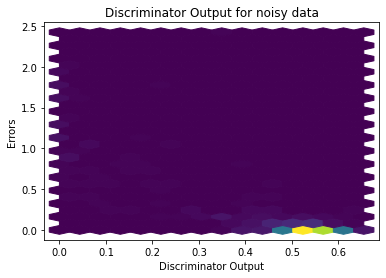

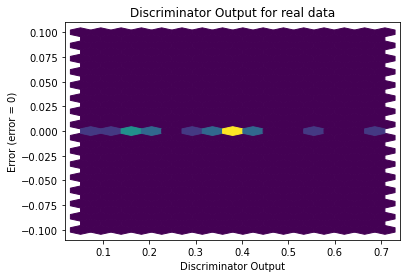

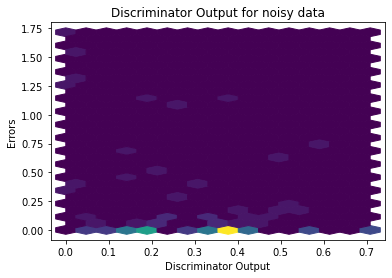

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


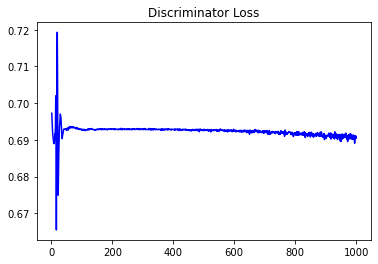

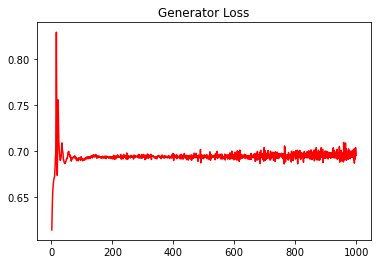

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.29087568223848936


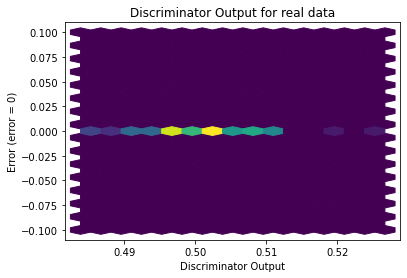

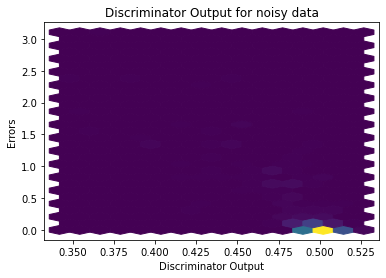

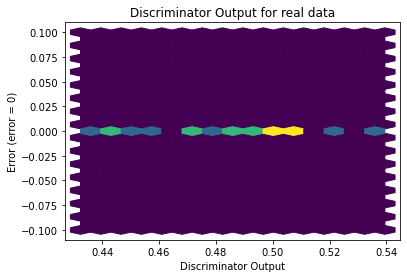

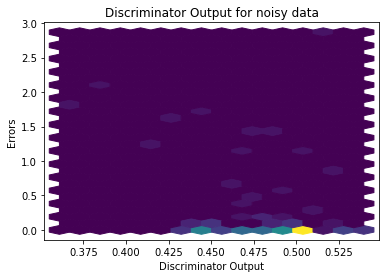

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


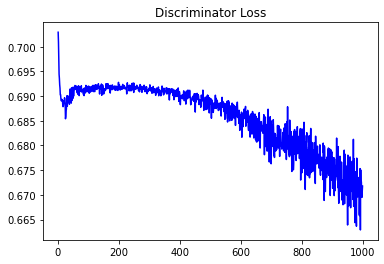

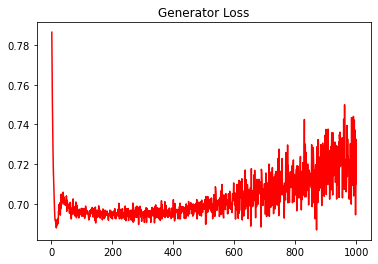

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.26632463702932


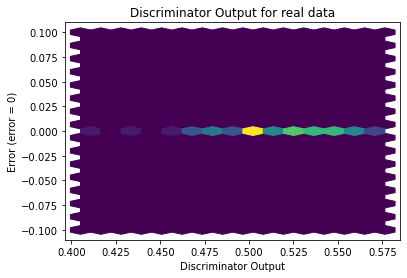

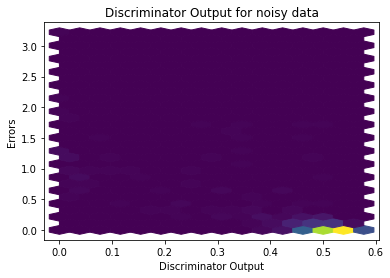

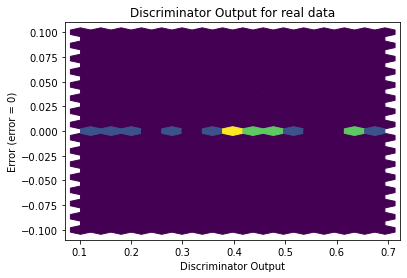

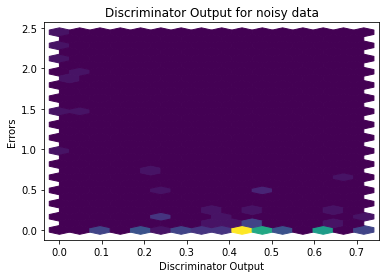

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4338]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1108]], requires_grad=True)
